In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def add_layer( inputs , in_size , out_size , activation_function= None):
    Weights = tf.Variable( tf.random_normal([in_size , out_size]))
    biases =  tf.Variable(tf.zeros([1,out_size]) + 0.1)
    wx_plus_b = tf.matmul(inputs , Weights) + biases
    if activation_function is None:
        outputs =wx_plus_b
    else:
        outputs = activation_function(wx_plus_b)
        
    
    return outputs    

In [16]:
X_data = np.linspace(-1,1,300)[:,np.newaxis]
noise =  np.random.normal(0, 0.05 , X_data.shape)
Y_data = np.square(X_data) - 0.5 + noise

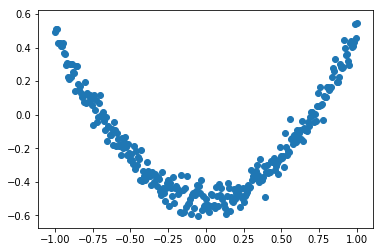

In [17]:
plt.scatter(X_data , Y_data)
plt.show()

In [18]:
xs = tf.placeholder(tf.float32 , [None ,1 ])
ys = tf.placeholder(tf.float32 , [None , 1] )

#### Add_Hidden_Layer

In [19]:
l1 = add_layer(xs , 1 , 10 , activation_function=tf.nn.relu)

#### Add_ OutPut_LAyer

In [20]:
prediction = add_layer(l1 , 10 , 1, activation_function=None)

 ### Loss

In [21]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices = [1] ))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [28]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

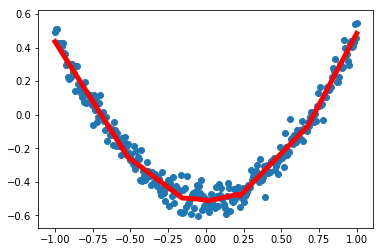

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_data , Y_data)
for i in range(10000):
    sess.run(train_step , feed_dict={xs : X_data , ys :Y_data})
    if(i%50==0):
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        prediction_value = sess.run( prediction ,feed_dict={xs:X_data})
        lines = ax.plot(X_data , prediction_value , 'r-' , lw = 5)
        plt.pause(0.001)
        plt.show()
        